In [22]:
%matplotlib inline
import numpy as np

# import velocity_tools.coordinate_offsets as c_offset
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.io import fits

# from astropy.wcs import WCS
import aplpy
from matplotlib import rc
rc('font',**{'family':'Helvetica','sans-serif':['Helvetica']}) 
rc('text', usetex=True)

import matplotlib as mpl
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

# d_per=280*u.pc
distance=145.*u.pc

/Users/jpineda/anaconda/envs/py3_plot/lib/python3.6/site-packages/mpl_toolkits/axes_grid/__init__.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  obj_type='module')


In [23]:
npeak=fits.getdata('npeaks_cut5.fits')
cube1=fits.getdata('l1688-gas-mle-x1.fits')
cube2=fits.getdata('l1688-gas-mle-x2.fits')

dv_DR1, hd=fits.getdata('L1688_Sigma_DR1_rebase3_flag.fits', header=True)

In [113]:
id0=np.where(npeak == 0)
id1=np.where(npeak == 1)
id2=np.where(npeak == 2)

v1=cube1[4,:,:]
v2a=cube2[4,:,:]
v2b=cube2[10,:,:]

N1=cube1[2,:,:]
N2a=cube2[2,:,:]
N2b=cube2[8,:,:]

dv1=cube1[3,:,:]
# edv1=cube1[3+6,:,:]
dv2a=cube2[3,:,:]
dv2b=cube2[9,:,:]
dv = np.append(dv1[id1], 
               np.append(dv2a[id2], dv2b[id2]))

dv_1c = np.append(dv1[id1], 
               np.min(np.array([dv2a[id2], dv2b[id2]]),axis=0))

id_DR1=np.where( np.isfinite(dv_DR1)* (dv_DR1 > 0.0))
dv_DR1_clean=dv_DR1[id_DR1]




/Users/jpineda/anaconda/envs/py3_plot/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


/Users/jpineda/anaconda/envs/py3_plot/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


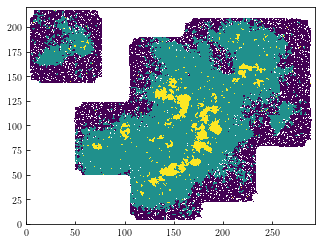

In [4]:
plt.imshow( npeak, origin='lowest')

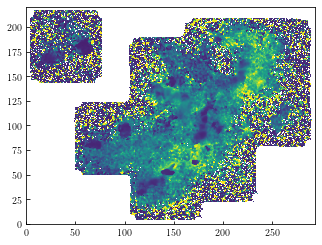

In [5]:
plt.imshow(dv1, origin='lowest', vmin=0, vmax=1.)

/Users/jpineda/anaconda/envs/py3_plot/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


INFO: Auto-setting vmin to -5.638e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.100e+00 [aplpy.core]
INFO: Auto-setting resolution to 49.4118 dpi [aplpy.core]


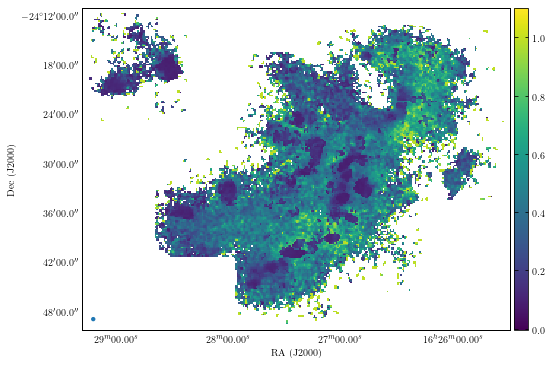

In [32]:
dv1p = dv1
dv1p[id0] = np.nan
dv2p_narrow=np.min( [dv2a,dv2b],axis=0)
dv1p[id2] = dv2p_narrow[id2] 

# plt.imshow(dv1p, origin='lowest', vmin=0, vmax=1.)
fig=aplpy.FITSFigure(fits.PrimaryHDU(data=dv1p, header=hd), figsize=(8,6))
fig.show_colorscale(cmap='viridis')
fig.add_colorbar()
fig.add_beam()
fig.savefig('L1688_Narrow_2comp.pdf')

/Users/jpineda/anaconda/envs/py3_plot/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/jpineda/anaconda/envs/py3_plot/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


INFO: Auto-setting resolution to 49.4118 dpi [aplpy.core]


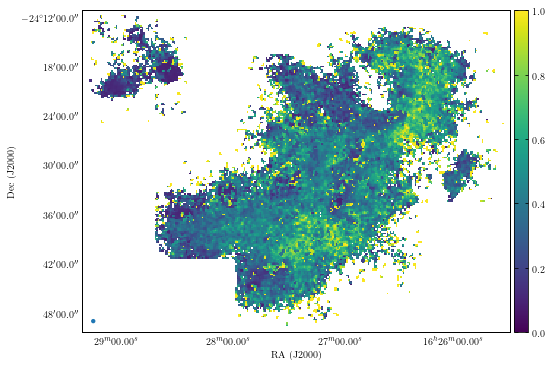

In [74]:
dv1p_w = dv1
dv1p_w[id0] = np.nan
dv2p_wide=np.max( [dv2a,dv2b],axis=0)
dv1p_w[id2] = dv2p_wide[id2] 


# plt.imshow(dv1p_w, origin='lowest', vmin=0, vmax=1.)
fig=aplpy.FITSFigure(fits.PrimaryHDU(data=dv1p_w, header=hd), figsize=(8,6))
fig.show_colorscale(cmap='viridis', vmin=0, vmax=1.0)
fig.add_colorbar()
fig.add_beam()
fig.savefig('L1688_Wide_2comp.pdf')

/Users/jpineda/anaconda/envs/py3_plot/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
/Users/jpineda/anaconda/envs/py3_plot/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


INFO: Auto-setting resolution to 49.4118 dpi [aplpy.core]


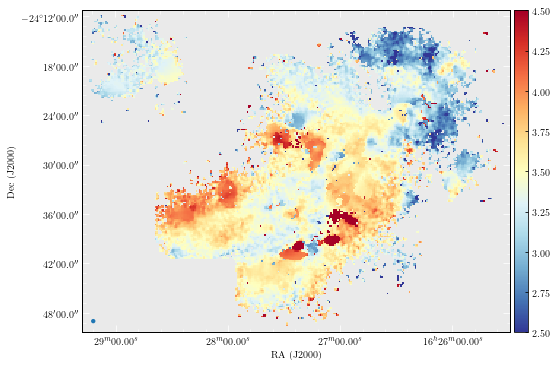

In [137]:
v1p_narrow = v1
v1p_narrow[id0] = np.nan
# v2p_narrow=np.min( [v2a,v2b],axis=0)
v2p_narrow= (dv2a<dv2b)*v2a + (dv2a>dv2b)*v2b
v1p_narrow[id2] = v2p_narrow[id2] 

fig=aplpy.FITSFigure(fits.PrimaryHDU(data=v1p_narrow, header=hd), figsize=(8,6))
fig.show_colorscale(cmap='RdYlBu_r', vmin=2.5, vmax=4.5)
fig.add_colorbar()
fig.set_nan_color('0.92')
fig.add_beam()
fig.savefig('L1688_Narrow_2comp_Vlsr.pdf')

/Users/jpineda/anaconda/envs/py3_plot/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jpineda/anaconda/envs/py3_plot/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


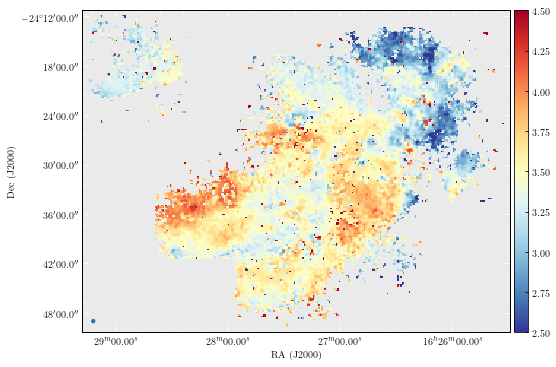

In [138]:
v1p_wide = v1
v1p_wide[id0] = np.nan
v2p_wide= (dv2a>dv2b)*v2a + (dv2a<dv2b)*v2b
v1p_wide[id2] = v2p_wide[id2] 

fig=aplpy.FITSFigure(fits.PrimaryHDU(data=v1p_wide, header=hd), figsize=(8,6))
fig.show_colorscale(cmap='RdYlBu_r', vmin=2.5, vmax=4.5)
fig.add_colorbar()
fig.set_nan_color('0.92')

fig.add_beam()
# fig.savefig('L1688_Wide_2comp_Vlsr.pdf')

/Users/jpineda/anaconda/envs/py3_plot/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/Users/jpineda/anaconda/envs/py3_plot/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


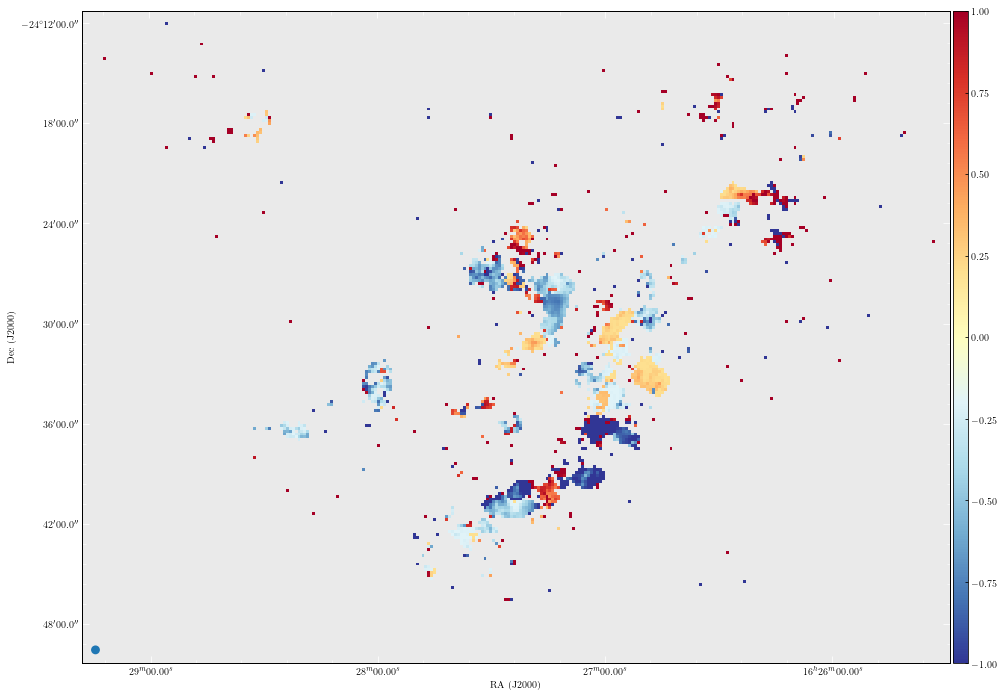

In [145]:
v1p_diff = v1
v1p_diff[id0] = np.nan
v1p_diff[id1] = np.nan
v2p_diff= (dv2a>dv2b)*(v2a-v2b) + (dv2a<dv2b)*(v2b-v2a)
v1p_diff[id2] = v2p_diff[id2]

fig=aplpy.FITSFigure(fits.PrimaryHDU(data=v1p_diff, header=hd), figsize=(16,12))
fig.show_colorscale(cmap='RdYlBu_r', vmin=-1., vmax=1.)
fig.add_colorbar()
fig.set_nan_color('0.92')

fig.add_beam()

In [ ]:
v1p_diff

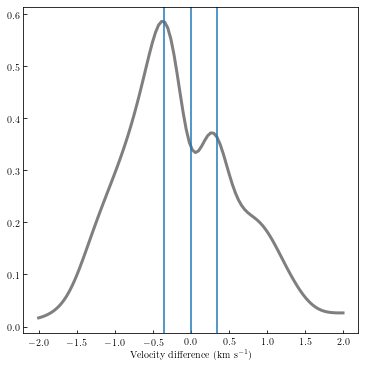

In [152]:
from scipy import stats
# from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

# from sklearn.grid_search import GridSearchCV
bandwidth=0.01
kde = gaussian_kde(v1p_narrow[id2], bw_method=0.2 / v1p_narrow[id2].std(ddof=1))
# kde_1c = gaussian_kde(dv_1c, bw_method=bandwidth / dv_1c.std(ddof=1))
# kde_DR1 = gaussian_kde(dv_DR1_clean, bw_method=bandwidth / dv_DR1_clean.std(ddof=1))

x_grid_diff = np.linspace(-2., 2., 100)
pdf_diff= kde.evaluate(x_grid_diff)
# pdf_DR1= kde_DR1.evaluate(x_grid)
# pdf_1c= kde_1c.evaluate(x_grid)

# DR1_MLE=(dv_1c.size/dv_DR1_clean.size)

fig, ax = plt.subplots(1, 1, figsize=(6,6))
plt.subplots_adjust(wspace=0,hspace=0)

ax.plot(x_grid_diff, pdf_diff, color='black', alpha=0.5, lw=3, label='DR1')
# ax.plot(x_grid, pdf, color='blue', alpha=0.5, lw=3, label='All components')
# ax.plot(x_grid, pdf_1c, color='red', alpha=0.5, lw=3, label='Narrowest component')
# ax.legend( frameon=False, prop={'size':13}, handlelength=1, loc=0)
ax.set_xlabel("Velocity difference  (km s$^{-1}$)")
ax.axvline(x=0)

ax.axvline(x=-0.35)
ax.axvline(x=0.35)
# ax.set_ylabel("Relative velocity, $|v-V_{LSR}|$ (km s$^{-1}$)")

# fig.savefig('L1688_dv_dist.pdf')

# np.nanmax(v1p_narrow)

/Users/jpineda/anaconda/envs/py3_plot/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/Users/jpineda/anaconda/envs/py3_plot/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


INFO: Auto-setting vmin to  1.277e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.494e+01 [aplpy.core]


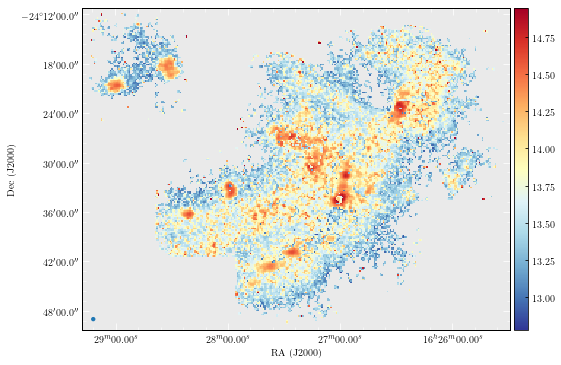

In [124]:
N1p_narrow = N1

N1p_narrow[id0] = np.nan
N2p_narrow= (dv2a>dv2b)*N2b + (dv2a<dv2b)*N2a
N1p_narrow[id2] = N2p_narrow[id2] 

fig=aplpy.FITSFigure(fits.PrimaryHDU(data=N1p_narrow, header=hd), figsize=(8,6))
fig.show_colorscale(cmap='RdYlBu_r')#, vmin=2.5, vmax=4.5)
fig.add_colorbar()
fig.set_nan_color('0.92')

fig.add_beam()
# fig.savefig('L1688_Wide_2comp_Vlsr.pdf')

/Users/jpineda/anaconda/envs/py3_plot/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/Users/jpineda/anaconda/envs/py3_plot/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


INFO: Auto-setting vmin to  1.278e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.496e+01 [aplpy.core]


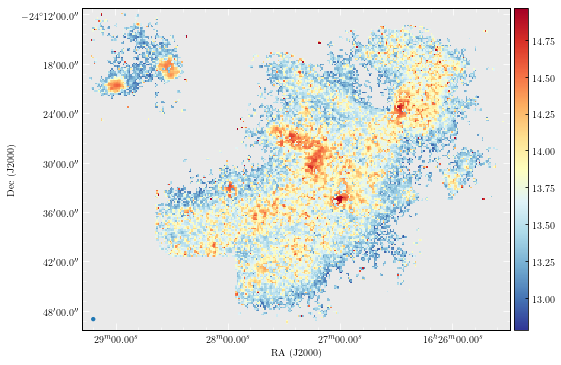

In [125]:
N1p_wide = N1

N1p_wide[id0] = np.nan
N2p_wide= (dv2a>dv2b)*N2a + (dv2a<dv2b)*N2b
N1p_wide[id2] = N2p_wide[id2] 

fig=aplpy.FITSFigure(fits.PrimaryHDU(data=N1p_wide, header=hd), figsize=(8,6))
fig.show_colorscale(cmap='RdYlBu_r')#, vmin=2.5, vmax=4.5)
fig.add_colorbar()
fig.set_nan_color('0.92')

fig.add_beam()
# fig.savefig('L1688_Wide_2comp_Vlsr.pdf')

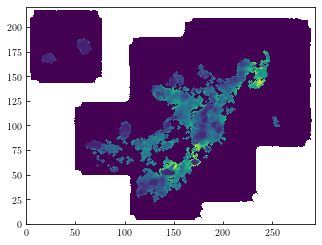

In [8]:
plt.imshow(dv_DR1, origin='lowest')

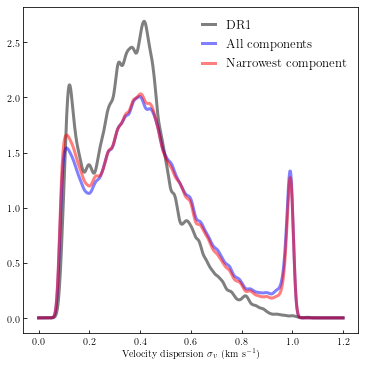

In [33]:
from scipy import stats
# from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

# from sklearn.grid_search import GridSearchCV
bandwidth=0.01
kde = gaussian_kde(dv, bw_method=bandwidth / dv.std(ddof=1))
kde_1c = gaussian_kde(dv_1c, bw_method=bandwidth / dv_1c.std(ddof=1))
kde_DR1 = gaussian_kde(dv_DR1_clean, bw_method=bandwidth / dv_DR1_clean.std(ddof=1))

x_grid = np.linspace(0.0, 1.2, 1000)
pdf= kde.evaluate(x_grid)
pdf_DR1= kde_DR1.evaluate(x_grid)
pdf_1c= kde_1c.evaluate(x_grid)

DR1_MLE=(dv_1c.size/dv_DR1_clean.size)

fig, ax = plt.subplots(1, 1, figsize=(6,6))
plt.subplots_adjust(wspace=0,hspace=0)

ax.plot(x_grid, pdf_DR1, color='black', alpha=0.5, lw=3, label='DR1')
ax.plot(x_grid, pdf, color='blue', alpha=0.5, lw=3, label='All components')
ax.plot(x_grid, pdf_1c, color='red', alpha=0.5, lw=3, label='Narrowest component')
ax.legend( frameon=False, prop={'size':13}, handlelength=1, loc=0)
ax.set_xlabel("Velocity dispersion $\sigma_{v}$ (km s$^{-1}$)")
# ax.set_ylabel("Relative velocity, $|v-V_{LSR}|$ (km s$^{-1}$)")

fig.savefig('L1688_dv_dist.pdf')

In [12]:
dv_1c.size/dv_DR1_clean.size

3.121813031161473

In [51]:
cube_mike=fits.getdata('L1688_NH3_11_2vcomp_parameter_maps_DR1_rebase3_clean.fits')

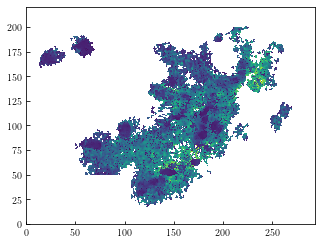

In [66]:
plt.imshow( cube_mike[1,:,:], origin='lowest', cmap='viridis', vmin=0, vmax=1.0)

### Compare the velocity dispersion

In [107]:
dv_mike_1=cube_mike[1,:,:]
dv_mike_2=cube_mike[5,:,:]

gd_mike = np.isfinite(dv_mike_2)
gd_vlas_mike = np.isfinite(dv_mike_2)*(npeak == 2)

# dv1p_w = dv_mike_1
# dv1p_w[id0] = np.nan
dv_mike_wide  =np.nanmax( [dv_mike_1,dv_mike_2],axis=0)
dv_mike_narrow=np.nanmin( [dv_mike_1,dv_mike_2],axis=0)
# dv1p_w[id2] = dv2p_wide[id2] 

/Users/jpineda/anaconda/envs/py3_plot/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: All-NaN axis encountered
  if __name__ == '__main__':
/Users/jpineda/anaconda/envs/py3_plot/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: All-NaN axis encountered
  # Remove the CWD from sys.path while we load stuff.


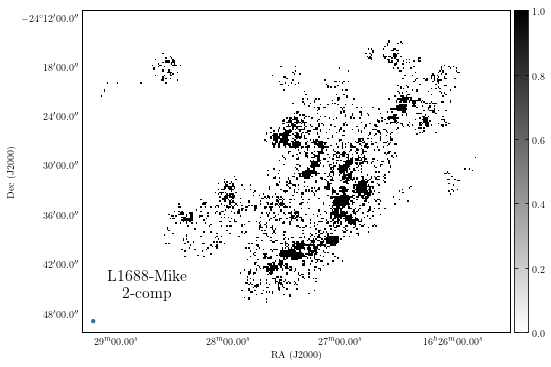

In [105]:
my_gd = dv_mike_2*0.0
my_gd[gd_mike]=1
fig=aplpy.FITSFigure(fits.PrimaryHDU(data=my_gd, header=hd), figsize=(8,6))
fig.show_grayscale(vmin=0, vmax=1.0, invert=True)
fig.add_colorbar()
fig.add_beam()
fig.add_label(0.15, 0.15, 'L1688-Mike\n2-comp', relative=True, size=16)
# plt.imshow(dv_mike_narrow, origin='lowest', vmin=0, vmax=1.0)

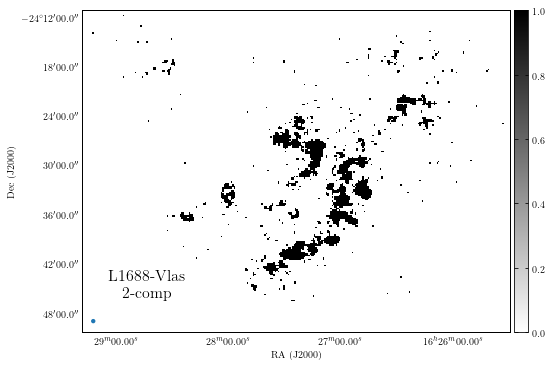

In [106]:
my_gd_v2 = dv_mike_2*0.0
my_gd_v2[id2]=1
fig=aplpy.FITSFigure(fits.PrimaryHDU(data=my_gd_v2, header=hd), figsize=(8,6))
fig.show_grayscale(vmin=0, vmax=1.0, invert=True)
fig.add_colorbar()
fig.add_beam()
fig.add_label(0.15, 0.15, 'L1688-Vlas\n2-comp', relative=True, size=16)

Text(0, 0.5, 'Vlas dv')

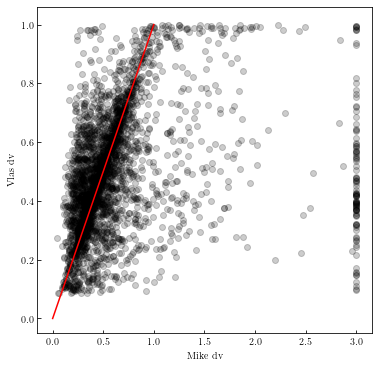

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
plt.subplots_adjust(wspace=0,hspace=0)

ax.scatter( dv_mike_wide[gd_mike], dv1p_w[gd_mike], alpha=0.2, color='black')
ax.plot([0,1], [0,1], color='red')

ax.set_xlabel("Mike dv")
ax.set_ylabel("Vlas dv")

Text(0, 0.5, 'Vlas dv')

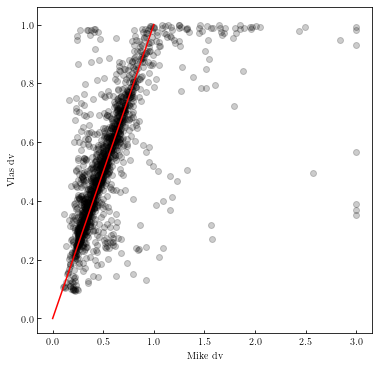

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
plt.subplots_adjust(wspace=0,hspace=0)

ax.scatter( dv_mike_wide[gd_vlas_mike], dv1p_w[gd_vlas_mike], alpha=0.2, color='black')
ax.plot([0,1], [0,1], color='red')

ax.set_xlabel("Mike dv")
ax.set_ylabel("Vlas dv")

Text(0, 0.5, 'Vlas dv')

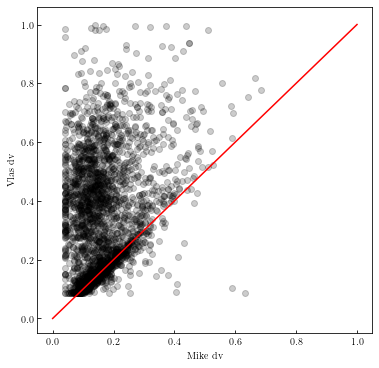

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
plt.subplots_adjust(wspace=0,hspace=0)

ax.scatter( dv_mike_narrow[gd_mike], dv1p[gd_mike], alpha=0.2, color='black')
ax.plot([0,1], [0,1], color='red')
ax.set_xlabel("Mike dv")
ax.set_ylabel("Vlas dv")

Text(0, 0.5, 'Vlas dv')

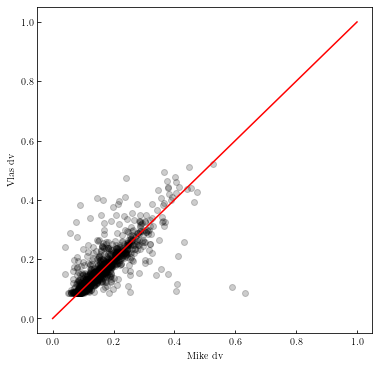

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
plt.subplots_adjust(wspace=0,hspace=0)

ax.scatter( dv_mike_narrow[gd_vlas_mike], dv1p[gd_vlas_mike], alpha=0.2, color='black')
ax.plot([0,1], [0,1], color='red')
ax.set_xlabel("Mike dv")
ax.set_ylabel("Vlas dv")

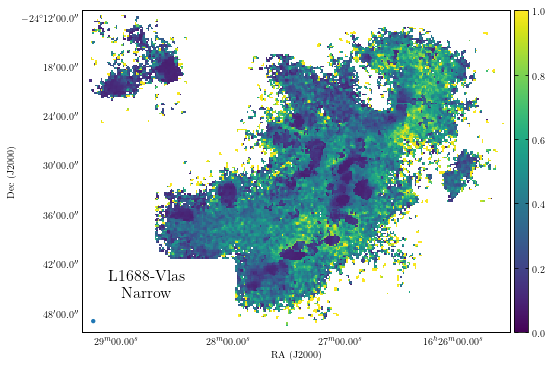

In [98]:
# plt.imshow(dv_mike_wide, origin='lowest', vmin=0, vmax=1.0)

fig=aplpy.FITSFigure(fits.PrimaryHDU(data=dv1p, header=hd), figsize=(8,6))
fig.show_colorscale(cmap='viridis', vmin=0, vmax=1.0)
fig.add_colorbar()
fig.add_beam()
fig.add_label(0.15, 0.15, 'L1688-Vlas\nNarrow', relative=True, size=16)
# plt.imshow(dv_mike_narrow, origin='lowest', vmin=0, vmax=1.0)

/Users/jpineda/anaconda/envs/py3_plot/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


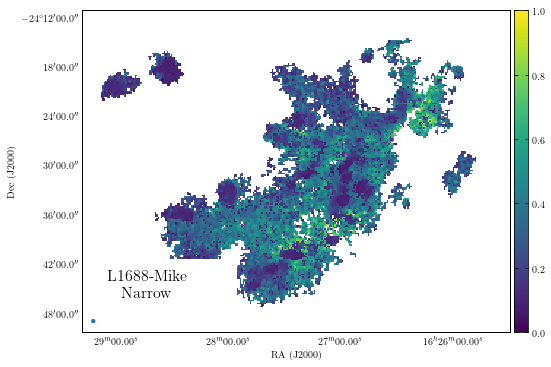

In [96]:
fig=aplpy.FITSFigure(fits.PrimaryHDU(data=dv_mike_narrow, header=hd), figsize=(8,6))
fig.show_colorscale(cmap='viridis', vmin=0, vmax=1.0)
fig.add_colorbar()
fig.add_beam()
fig.add_label(0.15, 0.15, 'L1688-Mike\nNarrow', relative=True, size=16)
# plt.imshow(dv_mike_narrow, origin='lowest', vmin=0, vmax=1.0)

/Users/jpineda/anaconda/envs/py3_plot/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


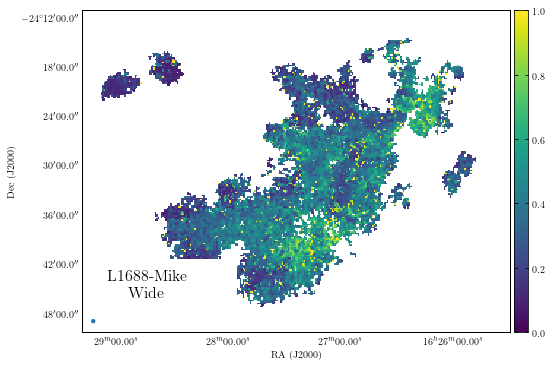

In [94]:
fig=aplpy.FITSFigure(fits.PrimaryHDU(data=dv_mike_wide, header=hd), figsize=(8,6))
fig.show_colorscale(cmap='viridis', vmin=0, vmax=1.0)
fig.add_colorbar()
fig.add_beam()
fig.add_label(0.15, 0.15, 'L1688-Mike\nWide', relative=True, size=16)

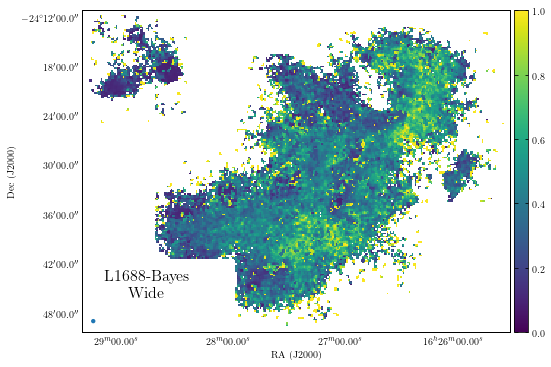

In [95]:
fig=aplpy.FITSFigure(fits.PrimaryHDU(data=dv1p_w, header=hd), figsize=(8,6))
fig.show_colorscale(cmap='viridis', vmin=0, vmax=1.0)
fig.add_colorbar()
fig.add_beam()
fig.add_label(0.15, 0.15, 'L1688-Bayes\nWide', relative=True, size=16)